# CS 2810 HW 6 Problem 2: Neural Networks (50 points)

You can answer all questions inline in this notebook, and submit the .ipynb file.  If you like, you can submit Problem 1 from the written work in this file as well, as long as it is in a cell above this one (Insert->Insert Cell Above).

### Academic Integrity

Under no circumstances should you observe another student's code which was written for this assignment.  Any code from the Internet must be attributed in a comment.

# Part 1:  Scikit-Learn and MNIST

Scikit-learn is a Python library full of machine learning implementations, and MNIST is a famous database of handwritten digits.  In this section, we'll see what it's like just to pull a neural network "off the shelf" and train it perform a task.

First, use the following code to download the MNIST data set.  The dataset consists of two parts, the pixel values for the 28x28 images of digits, and the labels for these images.  The following function returns these as the first and second return values, respectively.  Uncomment and run the line that fetches the data.  (Be patient on running the cell; it may take a bit to download.)

In [1]:
from sklearn.datasets import fetch_openml

# get_mnist:  takes no arguments, connects over the internet to retrieve the
# MNIST digits data in the form of a matrix where rows are inputs, and a vector
# that contains the true label of the digit (0-9)
def get_mnist():
    examples, labels = fetch_openml('mnist_784', version=1, return_X_y=True)
    return examples, labels

#X, y = get_mnist()

## Question A (4 points)

The following is a function designed to display the MNIST digits.  Alter the three code cells after the function definition to display MNIST digits 0, 1, and 2.  (That is, the first, second, and third digits in the database, not necessarily representing a 0, 1, or 2.)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

MNIST_WIDTH = 28

# show_mnist_index:  code to graphically display example i from matrix examples
# (which comes from get_mnist or similar)
def show_mnist_index(examples, i):
    # The colon operator selects "all" as the index, grabbing a whole row or column
    data_array = np.array(examples[i,:])
    # reshape takes the vector-like data and turns it into 2D, restoring the original shape
    image = np.reshape(data_array, (MNIST_WIDTH, MNIST_WIDTH))
    # Draw the image
    plt.imshow(image)
    # But matplotlib needs to be told to create the window or image
    plt.show()

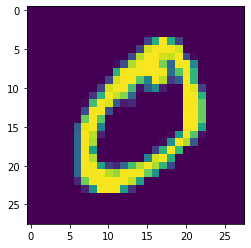

In [3]:
# call 0
X, y = get_mnist()
idx = 0
for idx in range(y.size):
    if y[idx] == '0':
        idx_for_zero = idx
        show_mnist_index(X, idx)
        break

        


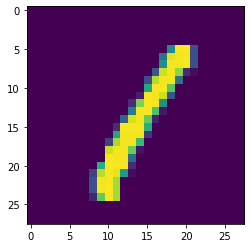

In [4]:
# call 1
idx = 0
for idx in range(y.size):
    if y[idx] == '1':
        show_mnist_index(X, idx)
        idx_for_one = idx
        break

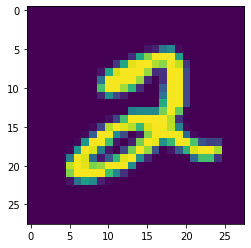

In [5]:
# call 2
idx = 0
for idx in range(y.size):
    if y[idx] == '2':
        show_mnist_index(X, idx)
        idx_for_two = idx
        break

We'll now use an existing neural network implementation to learn to classify the MNIST digits.  For this part, we'll use a neural network implementation from scikit-learn.

In [6]:
from sklearn.neural_network import MLPClassifier

# trained_network:  returns a neural network object ("clf" for "classifier")
# that can learn via stochastic gradient descent using its .fit() method,
# then make predictions about new data with its .predict() method (see below,
# as well as documentation at https://scikit-learn.org/stable/modules/neural_networks_supervised.html)
def trained_network(examples,labels):
    clf = MLPClassifier(solver='sgd',learning_rate='constant',learning_rate_init=0.001,max_iter=400,
            shuffle=True)
    clf.fit(examples,labels)
    return clf

Consult the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html (a different URL from the comment in the code) to answer the following questions.

## Question B (2 points)

How many neurons does trained_network give us in the hidden layer?

*the default amount which is equal to 100*

## Question C (2 points)

What activation function are its neurons using?

*the default: ‘relu’, the rectified linear unit function, returns f(x) = max(0, x)*

## Question D (3 points)

Go ahead and construct a network with a call to trained_network, and then call the following function to determine the classifications of the first three MNIST digits.  Leave your code in the notebook, and use print() calls to show the classifications.  (Note that you may need to wait a bit for the training of your network.)

In [7]:
# predict_mnist:  just a wrapper for a neural network's predict() function
# clf is the neural network returned earlier, examples is the example matrix from
# downloading the MNIST data, and i is an index to the ith example
def predict_mnist(clf, examples, i):
    return clf.predict([examples[i,:]])
#example_network = trained_network(X, y)
#print("Prediction for:","label 0, guess:", predict_mnist(example_network, X, idx_for_zero))
#show_mnist_index(X, idx_for_zero)
#print("Prediction for:", "label 1, guess:", predict_mnist(example_network, X, idx_for_one))
#show_mnist_index(X, idx_for_one)
#print("Prediction for:", "label 2, guess:", predict_mnist(example_network, X, idx_for_two))
#show_mnist_index(X, idx_for_two)

Typically, if we really wanted to evaluate a machine learning system, we would evaluate it by separating items into a *training set* that the algorithm can learn from, and a *test set* that the algorithm has never seen before, which can be used to evaluate the algorithm's performance on never-before-seen situations.  (Evaluating on the training set may lead to our thinking an algorithm is good when it's actually just memorized irrelevant features to react to.)  But, we don't have to do that here; instead, we'll drill down into how neural networks work.

# Part 2:  The Structure of the Neural Network

The structure of the single-hidden-layer MLPClassifier is pictured here:
https://scikit-learn.org/stable/modules/neural_networks_supervised.html

Even though backpropagation can be a bit tricky to implement correctly, the actual forward computation for a neural network is relatively easy, and you'll implement it now.


## Question E:  Predict()  (7 points)

Write a function predict(W_ij, W_jk, x) that takes the following parameters, all np.arrays:

* W_ij: The matrix giving the weights from input to hidden layer.  This should be structured so that multiplication by the vector $\vec{x}$ gives the correct activations at the hidden layer (not including the activation function)
* W_jk: The matrix giving the weights from the hidden layer to the output layer.  This should be structured so that multiplication by the vector of output of the hidden units gives the activation at the output layer.
* x is the input vector.

The function should then return the activations at the output layer.  So, you will need to do a little matrix multiplication, but then also pass the activations through an activation function at the hidden layer and the output layer.  For this assignment, assume the activation function is the sigmoid function; we've provided both the sigmoid and its derivative here (which you may or may not need).

We will also be using the bias weight that you recall from the perceptron; this is necessary to shift the decision boundary of a neuron off zero.  You can call np.append(x,1) to take a vector such as $\vec{x}$ and append a 1 for the bias weight to work with; that will allow the bias to be factored in using the same matrix multiplication.  If you prefer, we've also provided a wrapper for that function, append_1(), which might be more convenient to call.

In [8]:
# Append 1 for interaction with bias weight - this makes the calculation of the
# activations at the next layer a simple matrix multiplication
def append_1(x):
    return np.append(x, 1)


# Apply logistic (sigmoid) function to all elements of vector
def sigmoid(x):
    return [1/(1 + np.exp(-i)) for i in x]

# Derivative of the sigmoid for all elements of the vector
def sigmoid_deriv(x):
    return [(1/(1 + np.exp(-i))*(1 - (1/(1 + np.exp(-i))))) for i in x]

# See specifications on the inputs above
def predict(W_ij, W_jk, x):
    
    return sigmoid( W_jk @ sigmoid(W_ij @ x))

It's unusual to choose weights for a neural network, but for the purpose of understanding what they can do and how they work, it can be illuminating.  For the following exercise, we'll be working in a 2D input space similar to what we did with the perceptron.  We will choose three lines that will correspond to the three hidden units' preferred inputs that make them fire.  The output layer will then be tuned to prefer all three hidden units to be active before firing -- an AND over the three areas.  In this way, we can design a little neural network that responds to inputs falling within a particular triangle.

## Question F:  The Littlest Network (8 points)

Write a function littlest() that takes no inputs and returns two np.array matrices, W_ij and W_jk, that are the weights for the following network.

* Hidden unit 0 prefers input where y <= -x + 1.
* Hidden unit 1 prefers input where y <= x + 1.
* Hidden unit 2 prefers input above the line y = -1.
* The output unit multiplies each hidden unit by 2, sums, and wants the total to be above 5.4 (thus a 0.9 average or more).

You can think of each unit as being a kind of perceptron; rearrange the coefficients and multiply by -1 if necessary so that the equation is of the form ax + by + c >= 0.

In [9]:
# See above - return the desired weight matrices
def littlest():
    W_ij = np.array([[-1, -1, 1],
                     [1, -1, 1],
                     [0, -1, -1],
                     [1, 1, 1]])
    W_jk = np.array([[2, 2, 2, 2, 2]])
    return W_ij.T, W_jk

W_ij, W_jk = littlest()

## Question G:  Visualizing the Activations - Hidden Units (5 points)

If our neural network design worked, we theoretically should have a network that prefers inputs in a little region above the origin.  But let's check that the hidden units are doing the right thing, first.

The following code will plot a contour map of the response of one of the hidden units to x,y inputs.  Finish it by computing the correct value for each input combination xx[i][j], yy[i][j].  ("meshgrid" takes two arrays of values and makes 2 2D grids representing all possible combinations of them.)  Then *show the plot* for the first hidden unit.  (The code only needs to work with our particular 2-input, 3-hidden-unit architecture.)

In [15]:
# h is the index of the hidden element of interest
def plot_hidden(W_ij,h): 
    x = np.arange(-2, 2, 0.01)
    y = np.arange(-2, 2, 0.01)
    # Where x and y were 1D arrays of equally spaced values, meshgrid will
    # return a 2D grid of those values that try the various combinations of them;
    # this grid's x values are in the xx 2D array, and the y values are in the yy 2D array.
    # (For example, meshgrid on [0,1] and [0,1] returns [[0,1],[0,1]] and [[0,0],[1,1]],
    # corresponding to a grid containing (0,0), (1,0), (0,1), (1,1).)  This is handy for
    # working with 2D images that plot some function f(x,y) at each location.
    xx, yy = np.meshgrid(x,y)
    z = np.zeros((x.size, y.size))
    x_range, y_range = xx.shape
    for i in range(x_range):
        for j in range(y_range):

            z[i][j] = sigmoid(W_ij @ np.array([[xx[i, j]], [yy[i, j]], [1]])) # TODO:  your code here, computing the hidden activation for inputs xx[i][j], yy[i][j]
            # (note:  be careful about type; z doesn't want a list.  Add [0] if necessary.)
    h = plt.contourf(x,y,z)
    plt.show()

#uncomment these when ready
plot_hidden(W_ij,0)
plot_hidden(W_ij,1)
plot_hidden(W_ij,2)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 4)

## Question H:  Visualizing the Activation - Output Unit (5 points)

Now reuse the code above to plot the activation of the whole network in response to varying x and y values.
(Again, it only needs to work with our particular architecture.)

In [ ]:
def plot_sol_output(W_ij, W_jk):
    '''TODO, base this code on plot_hidden'''

# plot_sol_output(W_ij, W_jk)

## Question I:  Backpropagation and the Gradient (7 points)

We've mentioned the relationship between backpropagation and the gradient before; here's a chance to show you understand the relationship.  Provided is some code that computes the gradient of the squared error with respect to the weights of our single-hidden-layer network.  Use it to complete the provided backpropagation function, which is almost just a wrapper around the gradient-finding function.

In [ ]:
# Get gradient of error as a prerequisite for backprop
# Returns gradient as two matrices, containing the derivatives with respect to
# each element of each weight matrix
# x is the input vector and y is the desired output
# Training set is 0 or 1, so we'll interpret the class as whichever is closer
def get_gradient(W_ij, W_jk, x, y):
    hidden_in = W_ij @ append_1(x)
    hidden_out = sigmoid(hidden_in)
    last_layer_in = W_jk @ append_1(hidden_out)
    output = sigmoid(last_layer_in)
    last_layer_derivs = sigmoid_deriv(last_layer_in)
    last_layer_delta = [-2*(y[i] - output[i])*last_layer_derivs[i] for i in range(len(output))]
    # outer product of delta and hidden transpose gives us what we want, a matrix of derivs
    # with rows for different output and cols for different hidden units
    dloss_dW2 = np.outer(last_layer_delta, append_1(hidden_out))
    hidden_layer_derivs = sigmoid_deriv(hidden_in)
    # A column of the second weight matrix corresponds to the outgoing signal
    # from a particular hidden unit - dot this with the final layer deltas
    # We can do this for each row with a transpose and matrix multiplication
    weight_dots = W_jk.T @ last_layer_delta
    hidden_layer_delta = [hidden_layer_derivs[i]*weight_dots[i] for i in range(len(hidden_layer_derivs))]
    # Again, taking the outer product of the vectors produces a matrix with entries in the right spots
    dloss_dW1 = np.outer(hidden_layer_delta, append_1(x))
    return dloss_dW1, dloss_dW2

# Print accuracy and loss for a given network described by matrices W_ij and W_jk, using
# the predict function to evaluate its results.  Rows of X are examples.
# y is a matrix with the desired output, nx1 in the case of a single classification output.
def print_accuracy_and_loss(W_ij, W_jk, X, y):
    total_right = 0
    loss = 0
    for i in range(len(y)):
        out = predict(W_ij, W_jk, X[i,:])
        if (out[0] < 0.5 and y[i][0] == 0):
            total_right += 1
        if (out[0] >= 0.5 and y[i][0] == 1):
            total_right += 1
        loss += (y[i][0] - out[0]) ** 2
    accuracy = total_right/len(y)
    print('Accuracy:')
    print(accuracy)
    print('Loss:')
    print(loss)
    return accuracy, loss

LEARN_RATE = 0.1  # For your part in the following function - use this learning rate

# Do backprop learning for some number of rounds to a two-layer neural network with a single
# output.
# (Relu activation functions, so we'll assume >= 0 is a "yes."
# Takes the two starting weight matrices, a matrix with each example a row,
# a vector of desired outputs, and a desired number of epochs to run.
# All vector or matrix args should be np.arrays.
# Prints accuracy and loss as we go, so we can check that we're learning something.
# Returns the learned weight matrices.
def backprop_learn(W_ij, W_jk, X, y, epochs):
    for i in range(epochs):
        m, n = np.shape(X)
        for j in range(m):
            grad1, grad2 = get_gradient(W_ij, W_jk, X[j,:], y[j])
            # TODO:  we've got the gradient information for the two matrices, now what
            # do we do with it?
        print('Epoch ' + str(i))
        print_accuracy_and_loss(W_ij, W_jk, X, y)
    return W_ij, W_jk

## Question J:  Training the Tiny Network (5 points)

Here's a function that generates a small data set; train your tiny network to respond "YES" to its examples and "NO" to others by running backpropagation.  (The positive examples obey the function |x| + |y| <= 1.)  Use the random weight matrices provided to start.  Use plot_sol_output to show the final region that your network responds to.

In [ ]:
W_ij_rand = np.array([[-0.43740237,  0.27586301,  0.49627193],
       [ 0.49250938, -0.02014223,  0.18785578],
       [ 0.36062453,  0.28339736,  0.17899865],
       [-0.30877367,  0.19374126, -0.36042027]])

W_jk_rand = np.array([[-0.37300732,  0.31031975, -0.24113355,  0.29412743,  0.44585899]])

def generate_data(n, max_abs):
    myvals = np.random.rand(n, 2)
    myvals *= (max_abs * 2)
    myvals -= max_abs
    # myvals are valid x values now; compute y
    y = np.zeros((n,1))
    for i in range(n):
        if (abs(myvals[i][0]) + abs(myvals[i][1]) <= 1):
            y[i][0] = 1
    return myvals, y

Xabsdata, yabsdata = generate_data(100,1)

# Given network matrices and matrix X of examples,
# plot how the network classifies them (red for yes, blue for no)
def plot_sol_results(W_ij, W_jk, X):
    X_height, _ = X.shape
    for i in range(X_height):
        if predict(W_ij, W_jk, X[i,:])[0] > 0.5:
            plt.scatter(X[i,0], X[i,1], c='#ff0000')
        else:
            plt.scatter(X[i,0], X[i,1], c='#0000ff')
    plt.show()

# This should look pretty bad at first, since the weights are random;
# final result should classify points near the center as red
plot_sol_results(W_ij_rand, W_jk_rand, Xabsdata)

In [ ]:
# TODO:  use backprop to train W_ij_rand and W_jk_rand for 10000 epochs
# and call plot_sol_results again

We don't expect perfect accuracy with this tiny network, but you should expect accuracy in excess of 80%.

## Question K (2 points)

If you were to cause training to stop automatically when either loss or accuracy stopped improving by much, which would you choose as the trigger to stop learning?  Use what happened in your own training to support your position.

## Further direction: Keras and Tensorflow (not for credit)

If you want to experiment with more powerful neural networks in Python, look into the keras library, a user-friendly library which runs on top of Tensorflow, a library for fast neural network computations.  A variety of example code to play with can be found at https://github.com/keras-team/keras/tree/master/examples.  You will need to [install the keras and tensorflow libraries](https://keras.io/#installation) if they aren't already installed.